# Setup


As of the time of writing OpenCV is in version 4.4.0. Check out the GitHub repo for the latest https://github.com/opencv/opencv

Instructions on how to install OpenCV can be found at https://docs.opencv.org/master/da/df6/tutorial_py_table_of_contents_setup.html

The name of the Python package remains "cv2" which indicates the use of the second API version. The original Python binding differed significantly from version 2. Usually people keep the name "cv2" in their programs to indicate which API version they use.

In addition, we use Numpy for matrix and tensor operations. An image in OpenCV is a native numpy array $(height \times width)$ or tensor $(height \times width \times colors)$

The OpenCV package also contains some methods to display images and build a simple GUI. However, those won't work in Jupyter Notebooks. We use the Matplot.pyplot `imshow()` instead.  

**WARNING**
Be careful visiting the original web-site https://opencv.org. I experienced a few times that the domain was hijacked. Don't continue if the browser prompts you to download anything, like an update to Flash player.

In [1]:
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
print(f"OpenCV version: {cv2.__version__}")

OpenCV version: 4.4.0


# Basics

Let's use an image <img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Plain-M%26Ms-Pile.jpg" width="290px" height="220px">

The original is posted at https://upload.wikimedia.org/wikipedia/commons/e/e5/Plain-M%26Ms-Pile.jpg

In [42]:
# ! curl https://upload.wikimedia.org/wikipedia/commons/e/e5/Plain-M%26Ms-Pile.jpg > images/Plain-MnMs-Pile.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5976k  100 5976k    0     0  2489k      0  0:00:02  0:00:02 --:--:-- 2489k


In [3]:
img = cv2.imread('images/Plain-MnMs-Pile.jpg')
print(img.shape)

(2200, 2900, 3)


Can you guess which number stands for what? Number of colors, heigh of image, width of image?

And now display the image...

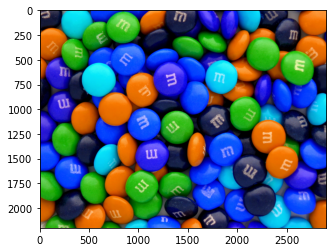

In [4]:
plt.imshow(img);

## Size, Scaling, Aspect Ratio

The original image is rather large with a high resolution resolution of 2900 by 2200 pixes. In many application processing an image of that resolution may require unnecessarily large computational resources. Most computer vision application operate with 512 $\time$ 512 or lower resolutions.

It's important to control the [Aspect Ratio](https://en.wikipedia.org/wiki/Aspect_ratio) when resizing images. 
The aspect ratio of a geometric shape is the ratio of its sizes in different dimensions. For example, the aspect ratio of a rectangle is the ratio of its longer side to its shorter side – the ratio of width to height,[1] when the rectangle is oriented as a "landscape".

The aspect ratio is most often expressed as two integer numbers separated by a colon (x:y), less commonly as a simple or decimal fraction. The values x and y do not represent actual widths and heights but, rather, the proportion between width and height. As an example, 8:5, 16:10, 1.6:1, $\frac{8}{5}$ and 1.6 are all ways of representing the same aspect ratio.


###  Resizes an image

https://docs.opencv.org/master/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d

Use `help(cv2.resize)` to see the documentation...

```resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst``` 

The function resize resizes the image src down to or up to the specified size. Note that the
initial dst type or size are not taken into account. Instead, the size and type are derived from
the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
you may call the function as follows:
```
    // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
    resize(src, dst, dst.size(), 0, 0, interpolation);
```

If you want to decimate the image by factor of 2 in each direction, you can call the function this
way:
```
    // specify fx and fy and let the function compute the destination image size.
    resize(src, dst, Size(), 0.5, 0.5, interpolation);
```

To shrink an image, it will generally look best with #INTER_AREA interpolation, whereas to
enlarge an image, it will generally look best with c#INTER_CUBIC (slow) or #INTER_LINEAR
(faster but still looks OK).

**Parameters**

-  `src` input image.
-  `dst` output image; it has the size dsize (when it is non-zero) or the size computed from src.size(), fx, and fy; the type of dst is the same as of src.
-  `dsize` output image size; if it equals zero, it is computed as: $\texttt{dsize = Size(round(fx*src.cols), round(fy*src.rows))}$ Either dsize or both fx and fy must be non-zero.
- `fx` scale factor along the horizontal axis; when it equals 0, it is computed as $\texttt{(double)dsize.width/src.cols}$
- `fy` scale factor along the vertical axis; when it equals 0, it is computed as
$\texttt{(double)dsize.height/src.rows}$
- `interpolation` interpolation method, see #InterpolationFlags


**See also:** warpAffine, warpPerspective, remap

In [22]:
print(f"Use one of the following interpolation flags: {', '.join(filter(lambda s: s.startswith('INTER_'), dir(cv2)))}")

Use one of the following interpolation flags: INTER_AREA, INTER_BITS, INTER_BITS2, INTER_CUBIC, INTER_LANCZOS4, INTER_LINEAR, INTER_LINEAR_EXACT, INTER_MAX, INTER_NEAREST, INTER_TAB_SIZE, INTER_TAB_SIZE2


### Scale by factor

In [27]:
for fxfy in [(0.5, 0.5), (0.2, 0.1), (0.1, 0.1)]:
    resized = cv2.resize(img, None, fx=fxfy[0], fy=fxfy[1])
    print(f"(fx, fy): {fxfy}\ttensor shape: {resized.shape}")

(fx, fy): (0.5, 0.5)	tensor shape: (1100, 1450, 3)
(fx, fy): (0.2, 0.1)	tensor shape: (220, 580, 3)
(fx, fy): (0.1, 0.1)	tensor shape: (220, 290, 3)


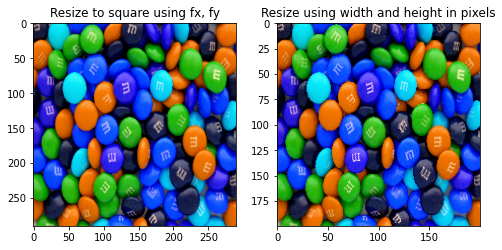

In [37]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(cv2.resize(img, None, fx=0.1, fy=0.132))
plt.title('Resize to square using fx, fy')

plt.subplot(1,2,2)
plt.imshow(cv2.resize(img, (200, 200)))
plt.title('Resize using width and height in pixels')
plt.show()
plt.close()

## Colors
The loaded image looks different because JPEG files are saved in BGR (Blue-Green-Red) coding, while Matplotlib assumes RGB (Red-Green-Blue). Since RGB is more common we usually convert a loaded image directly into RGB. The following shows some different color spaces.

More about colors at https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_colorspaces.html

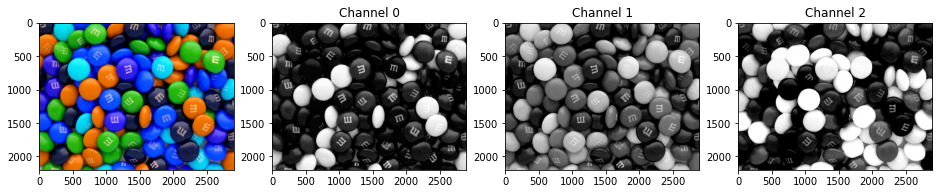

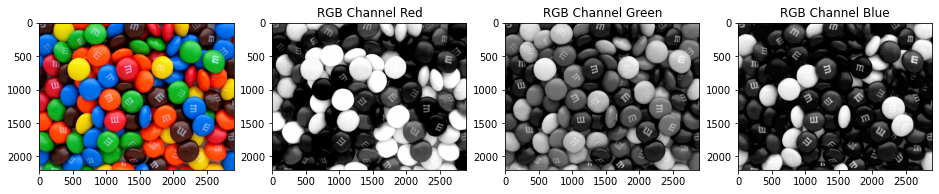

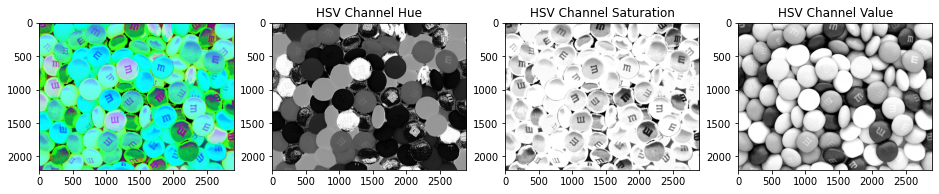

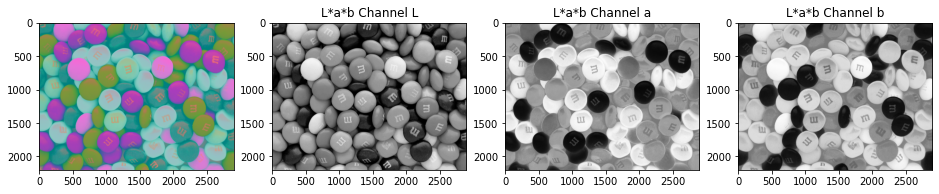

In [12]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(img)
for j in range(3):
    plt.subplot(1,4,j+2)
    plt.imshow(img[:,:,j], 'gray')
    plt.title(f"Channel {j}")
plt.show()
plt.close()

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb_titles = ['Red', 'Green', 'Blue']
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(rgb)
for j in range(3):
    plt.subplot(1,4,j+2)
    plt.imshow(rgb[:,:,j], 'gray')
    plt.title(f"RGB Channel {rgb_titles[j]}")
plt.show()
plt.close()

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv_titles = ['Hue', 'Saturation', 'Value']
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(hsv)
for j in range(3):
    plt.subplot(1,4,j+2)
    plt.imshow(hsv[:,:,j], 'gray')
    plt.title(f"HSV Channel {hsv_titles[j]}")
plt.show()
plt.close()

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
lab_titles = ['L', 'a', 'b']
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
plt.imshow(lab)
for j in range(3):
    plt.subplot(1,4,j+2)
    plt.imshow(lab[:,:,j], 'gray')
    plt.title(f"L*a*b Channel {lab_titles[j]}")
plt.show()
plt.close()


In [49]:
print(f"Color space conversion flags are named 'cv2.COLOR_...', there are a total of "
      f"{len(list(filter(lambda s: s.startswith('COLOR_'), dir(cv2))))}")

Color space conversion flags are named 'cv2.COLOR_...', there are a total of 274


Which of the image dimensions stay the same during color space conversion, which ones change?

# Drawing and Marking in Images

OpenCV provides a couple of simple methods for drawing onto an image. E.g. we may circle certain spots in the image, draw lines or rectangles, or even annotate markers with text. The corresponding functions are `cv2.line()`, `cv2.circle()`, `cv2.rectangle()`, `cv2.ellipse()`, `cv2.putText()`

See examples at 
https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_drawing_functions.html

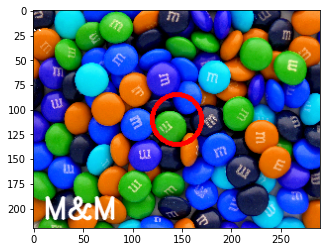

In [57]:
img2 = cv2.resize(img, (290, 220))  # we're using x,y coordinates, where is the point (10, 30)?
img3 = cv2.circle(img2, (145, 110), 25, (255,0,0), 3)

font = cv2.FONT_HERSHEY_SIMPLEX
img4 = cv2.putText(img3,'M&M',(10,210), font, 1, (255,255,255), 2, cv2.LINE_AA)

plt.imshow(img4)
plt.show()
plt.close()

# Exercise 1
Given is the image gray. Draw three lines across the image in different angles and in the colors: yellow, magenta, and cyan. Complete the code blow:

(440, 580)


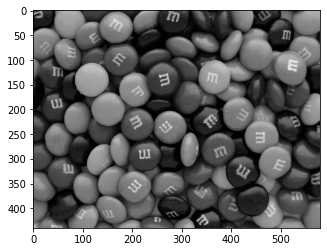

In [61]:
gray = cv2.cvtColor(cv2.resize(cv2.imread('images/Plain-MnMs-Pile.jpg'), (580, 440)), cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.imshow(gray, cmap='gray')
plt.show(); plt.close()

# enter your code to draw the three lines in yellow, magenta, and cyan
# ...
# ... your code here ...
# ...

# Now show the image ... assume it's res_img
print("Result:")
plt.imshow(res_img)
plt.show(); plt.close()




# Exercise 2
Use the RGB image `rgb` and plot the histogram of the intensity distribution for each channel, Red, Green, and Blue.
If you have fun with it try the other color spaces, too.

Use the `plt.hist()` command:

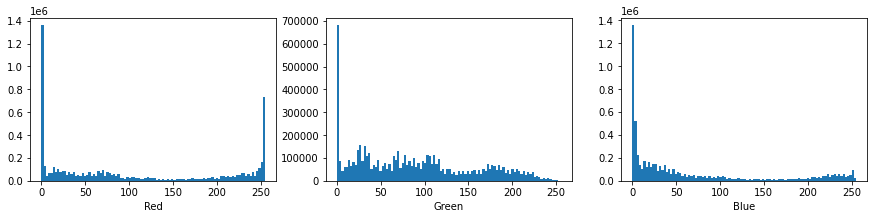

In [65]:
# complete the code, '...' is a place holder!

plt.figure(figsize=(15,3))

plt.subplot(1,3,1)
plt.hist(..., bins=100)
plt.xlabel('Red')

plt.subplot(1,3,2)
plt.hist(..., bins=100)
plt.xlabel('Green')

plt.subplot(1,3,3)
plt.hist(..., bins=100)
plt.xlabel('Blue')

plt.show(); plt.close()


# Exercise 3

Write code to count the total number of **real** blue M&Ms in the picture

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/Plain-M%26Ms-Pile.jpg" width="290px" height="220px">

Not everything that you need for solving this problem has been introduced in this notebook. Though, the examples and links to the OpenCV documentation should give you enough to get started.

**Links**
- Python tutorial: https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/page_tutorial_py_root.html
- Alternative site: https://docs.opencv.org/master/d6/d00/tutorial_py_root.html
